# Explore Basic LOB Feature Eng & Basic Modelling

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from paf.tardis_client import FTXFeed

sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_palette('husl')

## Load Raw Book State Data, 24 hours of data

In [3]:
feed = FTXFeed("BTC-PERP", "2020-02-01T00:00:00", "2020-02-02T00:00:00", "orderbook")
await feed.replay()

In [4]:
df = pd.DataFrame(feed.lob_states)

In [5]:
df.timestamp = pd.to_datetime(df.timestamp, unit='s')
df.index = df.timestamp

In [6]:
df.head()

,timestamp,AskRate0,AskSize0,BidRate0,BidSize0,AskRate1,AskSize1,BidRate1,BidSize1,AskRate2,...,BidRate7,BidSize7,AskRate8,AskSize8,BidRate8,BidSize8,AskRate9,AskSize9,BidRate9,BidSize9
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-01 00:00:02.542405844,2020-02-01 00:00:02.542405844,9352.5,66.0351,9352.5,66.0351,9352.00,94.4257,9352.00,94.4257,9345.75,...,9332.25,0.1473,9331.25,0.0109,9331.25,0.0109,9331.0,0.5,9331.0,0.5000
2020-02-01 00:00:02.563109636,2020-02-01 00:00:02.563109636,9352.5,66.0351,9352.5,66.0351,9352.00,94.4257,9352.00,94.4257,9345.75,...,9332.25,0.1473,9331.25,0.0109,9331.25,0.0109,9331.0,0.5,9331.0,0.5000
2020-02-01 00:00:02.689232588,2020-02-01 00:00:02.689232588,9352.5,66.0351,9352.5,66.0351,9350.75,84.6755,9345.75,83.7618,9345.75,...,9331.25,0.0109,9331.25,0.0109,9331.00,0.5000,9331.0,0.5,9326.0,0.4000
2020-02-01 00:00:02.963044882,2020-02-01 00:00:02.963044882,9352.5,66.0351,9352.5,66.0351,9350.75,84.6755,9344.00,0.0401,9344.00,...,9331.00,0.5000,9331.00,0.5000,9326.00,0.4000,9326.0,0.4,9325.0,427.9453
2020-02-01 00:00:03.014684200,2020-02-01 00:00:03.014684200,9352.5,66.0351,9352.5,66.0351,9350.75,84.6755,9344.00,0.0401,9344.00,...,9331.00,0.5000,9331.00,0.5000,9326.00,0.4000,9326.0,0.4,9325.0,427.9453


## Engineer Features

In [7]:
df['midprice'] = (df.AskRate0 + df.BidRate0) / 2

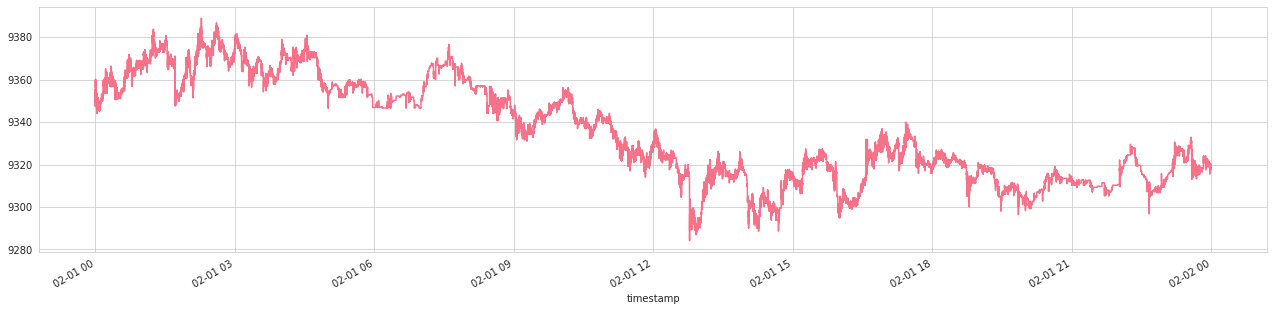

In [8]:
df.midprice.plot(figsize=(22,5))

In [9]:
df.head()

,timestamp,AskRate0,AskSize0,BidRate0,BidSize0,AskRate1,AskSize1,BidRate1,BidSize1,AskRate2,...,BidSize7,AskRate8,AskSize8,BidRate8,BidSize8,AskRate9,AskSize9,BidRate9,BidSize9,midprice
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-02-01 00:00:02.542405844,2020-02-01 00:00:02.542405844,9352.5,66.0351,9352.5,66.0351,9352.00,94.4257,9352.00,94.4257,9345.75,...,0.1473,9331.25,0.0109,9331.25,0.0109,9331.0,0.5,9331.0,0.5000,9352.5
2020-02-01 00:00:02.563109636,2020-02-01 00:00:02.563109636,9352.5,66.0351,9352.5,66.0351,9352.00,94.4257,9352.00,94.4257,9345.75,...,0.1473,9331.25,0.0109,9331.25,0.0109,9331.0,0.5,9331.0,0.5000,9352.5
2020-02-01 00:00:02.689232588,2020-02-01 00:00:02.689232588,9352.5,66.0351,9352.5,66.0351,9350.75,84.6755,9345.75,83.7618,9345.75,...,0.0109,9331.25,0.0109,9331.00,0.5000,9331.0,0.5,9326.0,0.4000,9352.5
2020-02-01 00:00:02.963044882,2020-02-01 00:00:02.963044882,9352.5,66.0351,9352.5,66.0351,9350.75,84.6755,9344.00,0.0401,9344.00,...,0.5000,9331.00,0.5000,9326.00,0.4000,9326.0,0.4,9325.0,427.9453,9352.5
2020-02-01 00:00:03.014684200,2020-02-01 00:00:03.014684200,9352.5,66.0351,9352.5,66.0351,9350.75,84.6755,9344.00,0.0401,9344.00,...,0.5000,9331.00,0.5000,9326.00,0.4000,9326.0,0.4,9325.0,427.9453,9352.5


## Resample to 10s groupings

In [10]:
df_X = df.midprice.resample('10S').agg([np.mean, np.size])
df_X.columns=['mean_midprice', 'n_book_changes']
df_X.head()

,mean_midprice,n_book_changes
timestamp,,
2020-02-01 00:00:00,9351.433333,120.0
2020-02-01 00:00:10,9352.882353,238.0
2020-02-01 00:00:20,9355.884884,215.0
2020-02-01 00:00:30,9350.024775,222.0
2020-02-01 00:00:40,9349.791925,161.0


/home/paul/.local/share/virtualenvs/paf-rmISNKHP/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until
/home/paul/.local/share/virtualenvs/paf-rmISNKHP/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/paul/.local/share/virtualenvs/paf-rmISNKHP/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/paul/.local/share

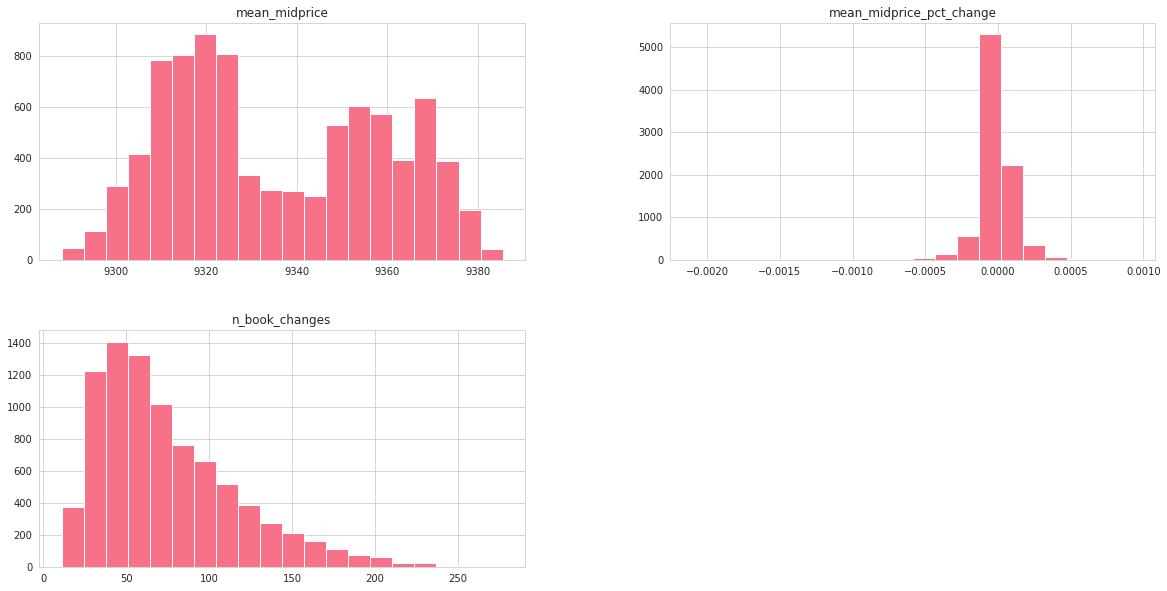

In [11]:
fig, ax = plt.subplots(figsize=(20,10))
df_X['mean_midprice_pct_change'] = df_X['mean_midprice'].pct_change()
df_X.hist(ax=ax, bins=20)
pass

## Create target variable, midprice in 6 timesteps (1 min)

In [12]:
df_X['mean_midprice_t+6'] = df_X['mean_midprice'].shift(-6)
df_X.head(10)

,mean_midprice,n_book_changes,mean_midprice_pct_change,mean_midprice_t+6
timestamp,,,,
2020-02-01 00:00:00,9351.433333,120.0,NaN,9352.249074
2020-02-01 00:00:10,9352.882353,238.0,0.000155,9354.462225
2020-02-01 00:00:20,9355.884884,215.0,0.000321,9350.235902
2020-02-01 00:00:30,9350.024775,222.0,-0.000626,9351.441250
2020-02-01 00:00:40,9349.791925,161.0,-0.000025,9351.051471
2020-02-01 00:00:50,9350.938859,184.0,0.000123,9352.560096
2020-02-01 00:01:00,9352.249074,135.0,0.000140,9351.667939
2020-02-01 00:01:10,9354.462225,182.0,0.000237,9345.996454
2020-02-01 00:01:20,9350.235902,133.0,-0.000452,9345.552419


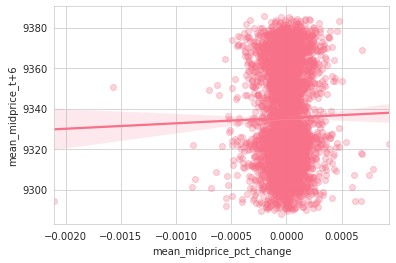

In [13]:
sns.regplot(x='mean_midprice_pct_change', y='mean_midprice_t+6', data=df_X, scatter_kws={"alpha":0.3})

## Model

### mean_midprice + mean_midprice_pct_change -> midprice_t+6

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [15]:
df_X = df_X.dropna()

X = df_X[['mean_midprice', 'mean_midprice_pct_change']]
y = df_X['mean_midprice_t+6']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.coef_)

[ 9.94375943e-01 -1.79779677e+03]


In [17]:
r2_score(y_test, y_pred)

0.9905972618958465

In [18]:
mean_absolute_error(y_test, y_pred)

1.5074890533420477

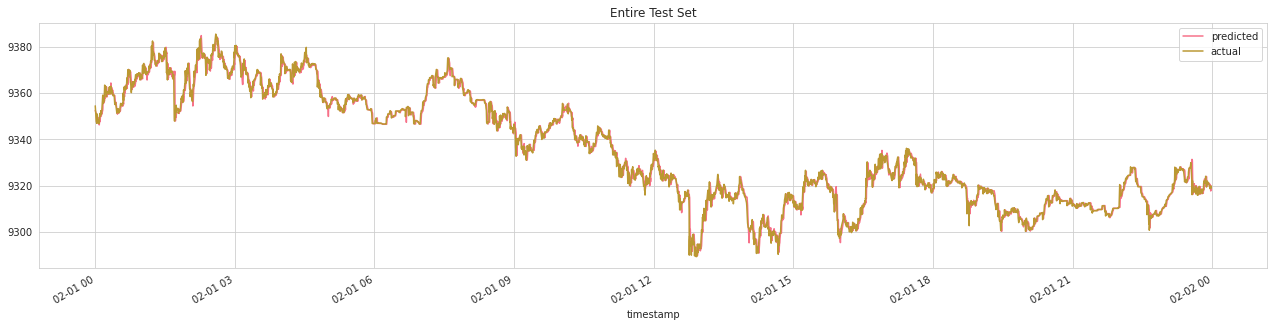

In [19]:
pd.DataFrame({'predicted': y_pred, 'actual': y_test}, index=X_test.index).plot(figsize=(22,5), title='Entire Test Set')

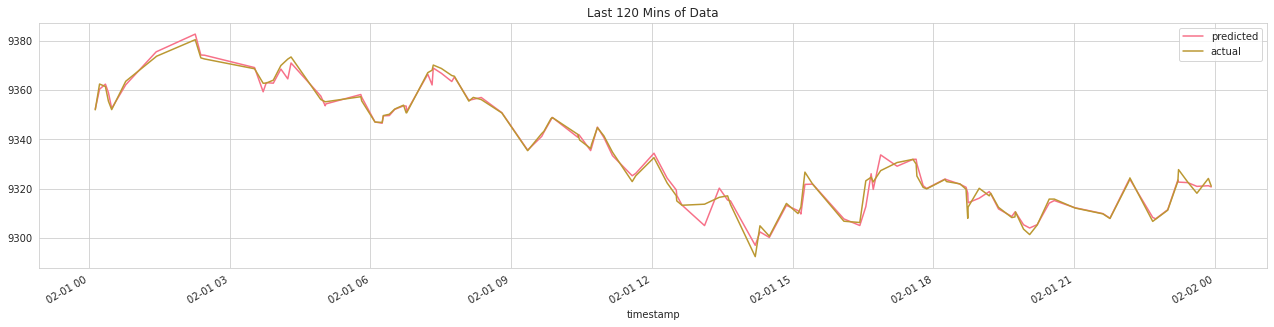

In [20]:
pd.DataFrame({'predicted': y_pred, 'actual': y_test}, index=X_test.index).tail(120).plot(figsize=(22,5), title='Last 120 Mins of Data')

In [21]:
df_eval = pd.DataFrame({'predicted': y_pred, 'actual': y_test}, index=X_test.index)

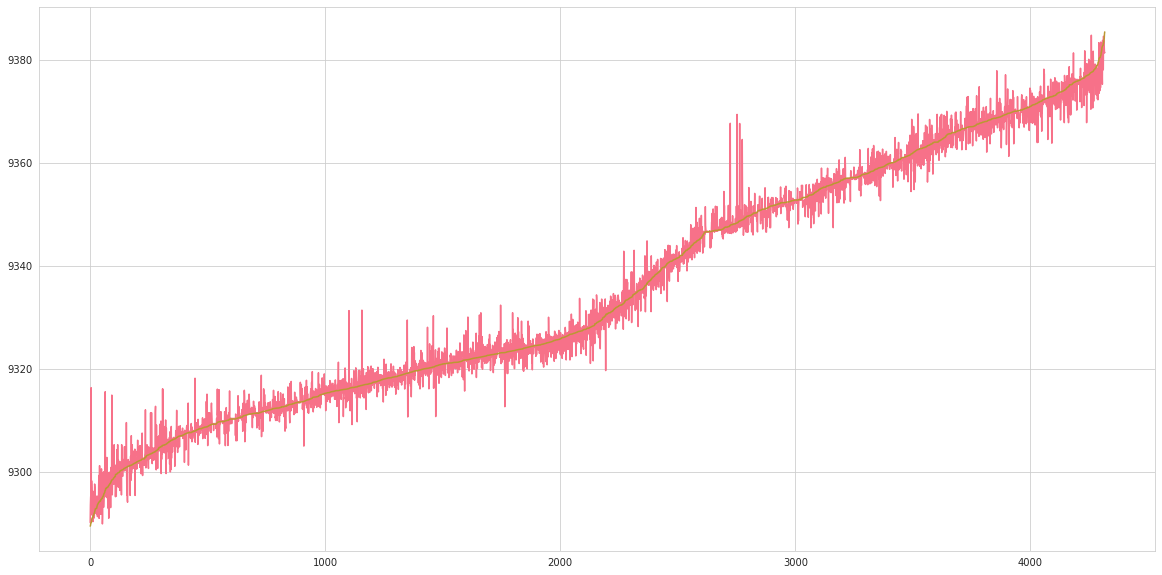

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
df_eval['error'] = df_eval.predicted - df_eval.actual
df_eval['pct_diff'] = df_eval.error / df_eval.actual * 100
plt.plot(df_eval.sort_values('actual')[['predicted', 'actual']].values)
pass

## Result?

Although plots and errors look good at a glance, an MAE of ~1.507 is actually quite bad.<br>
If you were to just predict that the midprice does not change at all, you would have a smaller error.

In [23]:
mean_absolute_error(y_test, X_test['mean_midprice'])

1.5066950087464521